# Activity 3 - Gradient Descent

Implement the same model as Activity 2 using gradient descent

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# Suppress pandas warnings for now
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
# Loading the data from activity 1
df = pd.read_csv('activity2_measurements.csv')
df_first_year = pd.read_csv('activity3_first_year.csv')
rolling = pd.read_csv('activity2_rolling.csv')
window = 20

# Trendline values
trend_x = np.array([
    1,
    182.5,
    365
])

Create a generic gradient descent model and normalise the Day of Year values as be between 0 and 1.

In [2]:
grad_model = SGDRegressor()
_x = df_first_year.DayOfYear / df_first_year.DayOfYear.max()

Fit the model

In [3]:
grad_model.fit(_x.values.reshape((-1, 1)), df_first_year.TempAvgF)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

Print the details of the model

In [4]:
print(f'm = {grad_model.coef_[0]}')
print(f'c = {grad_model.intercept_[0]}')

print('\nModel Definition')
print(f'y = {grad_model.coef_[0]:0.4}x + {grad_model.intercept_[0]:0.4f}')

m = 25.998839045898528
c = 55.40996895884283

Model Definition
y = 26.0x + 55.4100


Prepare the trendline x (_trend_x) values by dividing by the maximum.  Predict the y_trend_values using the gradient descent model

In [7]:
_trend_x = trend_x / trend_x.max()
trend_y = grad_model.predict(_trend_x.reshape((-1, 1)))
trend_y

array([55.48119865, 68.40938848, 81.408808  ])

Plot the drata and moving average with the trendline

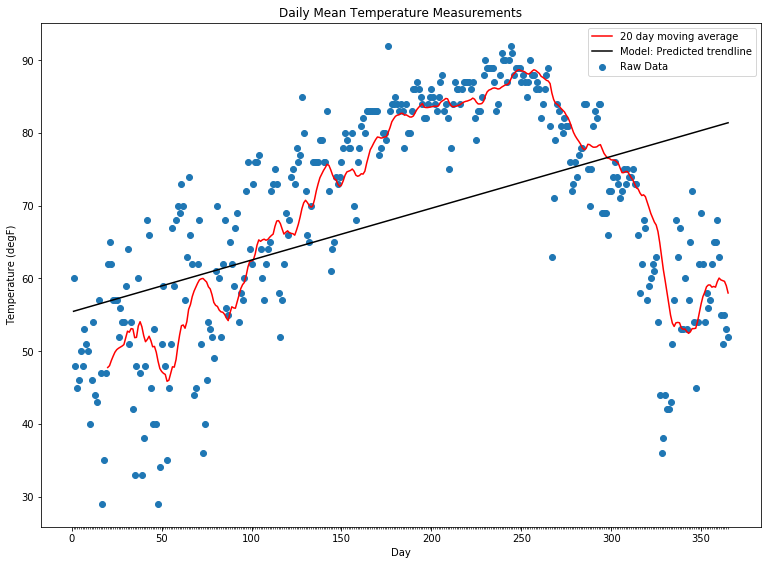

In [8]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_first_year.DayOfYear, df_first_year.TempAvgF, label='Raw Data');
ax.plot(df_first_year.DayOfYear, rolling, c='r', label=f'{window} day moving average');
ax.plot(trend_x, trend_y, c='k', label='Model: Predicted trendline')

ax.set_title('Daily Mean Temperature Measurements')
ax.set_xlabel('Day')
ax.set_ylabel('Temperature (degF)')
ax.set_xticks(range(1, 366), 10)
ax.legend();